# Build A Machine Learning Model To Predict Input Feature As An Output

- Here we go for predicting three input features like an output they are **Exposure Time, Light of delay, and Layer height.**
- **Surface Roughness and Orientation** are input variables.

# Importing Libraries

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [105]:
df= pd.read_excel('1- DoE and Data.xlsx')

# Data Cleaning And Filteration

In [106]:
df.head()

,StdOrder,RunOrder,Layer Height,Exposure Time,Light Off Delay,Orientation,Time,Diameter,Length,Height 1,Square Pin Width,Square Pin Length,Height 2,Surface Roughness
0,35,1,0.050,2.25,12,Z,137,4.077,12.035,3.080,2.005,2.125,7.040,2.2
1,10,2,0.075,2.50,12,X,93,4.202,11.935,3.005,2.015,1.975,7.055,1.9
2,2,3,0.100,2.00,13,X,74,4.128,12.020,3.110,2.115,2.070,7.090,2.5
3,31,4,0.050,2.00,13,Z,143,4.148,11.970,3.100,1.975,2.070,7.010,2.0
4,36,5,0.100,2.25,12,Z,70,3.885,12.150,3.215,1.860,2.045,7.010,5.2


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StdOrder           45 non-null     int64  
 1   RunOrder           45 non-null     int64  
 2   Layer Height       45 non-null     float64
 3   Exposure Time      45 non-null     float64
 4   Light Off Delay    45 non-null     int64  
 5   Orientation        45 non-null     object 
 6   Time               45 non-null     int64  
 7   Diameter           45 non-null     float64
 8   Length             45 non-null     float64
 9   Height 1           45 non-null     float64
 10  Square Pin Width   45 non-null     float64
 11  Square Pin Length  45 non-null     float64
 12  Height 2           45 non-null     float64
 13  Surface Roughness  45 non-null     float64
dtypes: float64(9), int64(4), object(1)
memory usage: 5.0+ KB


In [108]:
np.sum(df.isna())

StdOrder             0
RunOrder             0
Layer Height         0
Exposure Time        0
Light Off Delay      0
Orientation          0
Time                 0
Diameter             0
Length               0
Height 1             0
Square Pin Width     0
Square Pin Length    0
Height 2             0
Surface Roughness    0
dtype: int64

In [109]:
df.columns

Index(['StdOrder', 'RunOrder', 'Layer Height', 'Exposure Time',
       'Light Off Delay', 'Orientation', 'Time', 'Diameter', 'Length',
       'Height 1', 'Square Pin Width', 'Square Pin Length', 'Height 2',
       'Surface Roughness'],
      dtype='object')

In [110]:
df_1= df[['Layer Height', 'Exposure Time','Light Off Delay', 'Orientation','Surface Roughness']]

In [111]:
df_1.head()

,Layer Height,Exposure Time,Light Off Delay,Orientation,Surface Roughness
0,0.050,2.25,12,Z,2.2
1,0.075,2.50,12,X,1.9
2,0.100,2.00,13,X,2.5
3,0.050,2.00,13,Z,2.0
4,0.100,2.25,12,Z,5.2


In [112]:
from sklearn.preprocessing import LabelEncoder
df_1.Orientation= LabelEncoder().fit_transform(df['Orientation'])

S:\softwares\Anaconda\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [113]:
df_1.head()

,Layer Height,Exposure Time,Light Off Delay,Orientation,Surface Roughness
0,0.050,2.25,12,2,2.2
1,0.075,2.50,12,0,1.9
2,0.100,2.00,13,0,2.5
3,0.050,2.00,13,2,2.0
4,0.100,2.25,12,2,5.2


In [114]:
df_1.rename(columns={'Layer Height':'lr_h','Exposure Time':'exp_t','Light Off Delay':'lod','Surface Roughness':'surf_R'},inplace=True)

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
array= scaler.fit_transform(df_1[['exp_t', 'lod']])
df_nor= pd.DataFrame(data=array,columns=['exp_t', 'lod'])

S:\softwares\Anaconda\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [115]:
df_nor_1= df_1.drop(['exp_t', 'lod'],axis=1)
df_norm= pd.concat([df_nor_1,df_nor],axis='columns')

In [116]:
df_norm.head()

,lr_h,Orientation,surf_R,exp_t,lod
0,0.050,2,2.2,0.5,0.0
1,0.075,0,1.9,1.0,0.0
2,0.100,0,2.5,0.0,0.5
3,0.050,2,2.0,0.0,0.5
4,0.100,2,5.2,0.5,0.0


# Correlation or 4th Dimensional plot

In [117]:
df_norm.columns

Index(['lr_h', 'Orientation', 'surf_R', 'exp_t', 'lod'], dtype='object')

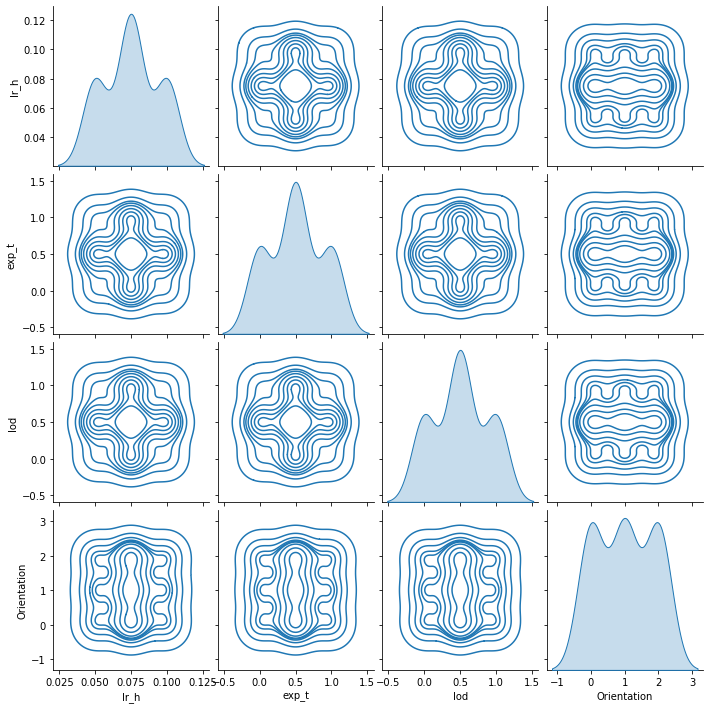

In [118]:
sns.pairplot(df_norm[['lr_h', 'exp_t', 'lod', 'Orientation']],kind='kde')

In [119]:
x= df_norm[['surf_R', 'Orientation']]
y= df_norm.drop(['surf_R', 'Orientation'],axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [120]:
y_train.shape, y_test.shape

((36, 3), (9, 3))

In [121]:
y_train.columns

Index(['lr_h', 'exp_t', 'lod'], dtype='object')

In [123]:
x_train.columns

Index(['surf_R', 'Orientation'], dtype='object')

# LinearRegression 

In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

lr_model= LinearRegression()
lr_model.fit(x_train,y_train)


def predicted_value(model,surf_R,orientation):
    y_pred= model.predict([[surf_R,orientation]])
    actual_value= [y_pred[0][0],0,0]
    array = ['lr_h', 'exp_t', 'lod']
    for i in range(len(model.predict([[surf_R,orientation]])[0])):
        if i>0:
            a= np.max(df_1[array[i]])
            b= np.min(df_1[array[i]])
            c= y_pred[0][i]
            actual = (a-b)*c+b
            actual_value[i]=actual
    return actual_value

y_pred_x=predicted_value(lr_model,0,0)
y_pred_y=predicted_value(lr_model,0,1)
y_pred_z=predicted_value(lr_model,0,2)

RMSE= mean_squared_error(y_test,lr_model.predict(x_test),squared=False)
MAE= mean_absolute_error(y_test,lr_model.predict(x_test))
print('RMSE:','%0.3f'%RMSE,'and MAE:','%0.3f'%MAE)
print("Predicted values: ['lr_h', 'exp_t', 'lod'] \n",'On X axis: ',y_pred_x,'\n','On y axis: ',y_pred_y,'\n','On z axis: ',y_pred_z)

test_result_x= {}
test_result_x['Linear_model']= RMSE,MAE,y_pred_x[0],y_pred_x[1],y_pred_x[2]
test_result_y= {}
test_result_y['Linear_model']= RMSE,MAE,y_pred_y[0],y_pred_y[1],y_pred_y[2]
test_result_z= {}
test_result_z['Linear_model']= RMSE,MAE,y_pred_z[0],y_pred_z[1],y_pred_z[2]


RMSE: 0.238 and MAE: 0.177
Predicted values: ['lr_h', 'exp_t', 'lod'] 
 On X axis:  [0.0579109319513952, 2.2018394988464456, 12.895427460413671] 
 On y axis:  [0.05170942645971443, 2.2091686157029384, 12.804665310539393] 
 On z axis:  [0.04550792096803366, 2.2164977325594313, 12.713903160665115]


# DecisionTreeRegressor

In [133]:
from sklearn.tree import DecisionTreeRegressor
dec_reg_model= DecisionTreeRegressor()
dec_reg_model.fit(x_train,y_train)

y_pred_x=predicted_value(dec_reg_model,0,0)
y_pred_y=predicted_value(dec_reg_model,0,1)
y_pred_z=predicted_value(dec_reg_model,0,2)

RMSE= mean_squared_error(y_test,dec_reg_model.predict(x_test),squared=False)
MAE= mean_absolute_error(y_test,dec_reg_model.predict(x_test))
print('RMSE:','%0.3f'%RMSE,'and MAE:','%0.3f'%MAE)
print("Predicted values: ['lr_h', 'exp_t', 'lod'] \n",'On X axis: ',y_pred_x,'\n','On y axis: ',y_pred_y,'\n','On z axis: ',y_pred_z)

test_result_x['Decision Tree']= RMSE,MAE,y_pred_x[0],y_pred_x[1],y_pred_x[2]

test_result_y['Decision Tree']= RMSE,MAE,y_pred_y[0],y_pred_y[1],y_pred_y[2]

test_result_z['Decision Tree']= RMSE,MAE,y_pred_z[0],y_pred_z[1],y_pred_z[2]


RMSE: 0.371 and MAE: 0.267
Predicted values: ['lr_h', 'exp_t', 'lod'] 
 On X axis:  [0.07500000000000001, 2.0, 12.0] 
 On y axis:  [0.07500000000000001, 2.0, 12.0] 
 On z axis:  [0.07500000000000001, 2.0, 12.0]


# Lasso Regression

In [134]:
from sklearn.linear_model import Lasso
lasso_model= Lasso()
lasso_model.fit(x_train,y_train)

y_pred_x=predicted_value(lasso_model,0,0)
y_pred_y=predicted_value(lasso_model,0,1)
y_pred_z=predicted_value(lasso_model,0,2)

RMSE= mean_squared_error(y_test,lasso_model.predict(x_test),squared=False)
MAE= mean_absolute_error(y_test,lasso_model.predict(x_test))
print('RMSE:','%0.3f'%RMSE,'and MAE:','%0.3f'%MAE)
print("Predicted values: ['lr_h', 'exp_t', 'lod'] \n",'On X axis: ',y_pred_x,'\n','On y axis: ',y_pred_y,'\n','On z axis: ',y_pred_z)

test_result_x['Lasso Regression']= RMSE,MAE,y_pred_x[0],y_pred_x[1],y_pred_x[2]

test_result_y['Lasso Regression']= RMSE,MAE,y_pred_y[0],y_pred_y[1],y_pred_y[2]

test_result_z['Lasso Regression']= RMSE,MAE,y_pred_z[0],y_pred_z[1],y_pred_z[2]

RMSE: 0.226 and MAE: 0.162
Predicted values: ['lr_h', 'exp_t', 'lod'] 
 On X axis:  [0.07083333333333332, 2.25, 13.055555555555555] 
 On y axis:  [0.07083333333333332, 2.25, 13.055555555555555] 
 On z axis:  [0.07083333333333332, 2.25, 13.055555555555555]


# Ridge Regression

In [135]:
from sklearn.linear_model import Ridge
ridge_model= Ridge()
ridge_model.fit(x_train,y_train)

y_pred_x=predicted_value(ridge_model,0,0)
y_pred_y=predicted_value(ridge_model,0,1)
y_pred_z=predicted_value(ridge_model,0,2)

RMSE= mean_squared_error(y_test,ridge_model.predict(x_test),squared=False)
MAE= mean_absolute_error(y_test,ridge_model.predict(x_test))
print('RMSE:','%0.3f'%RMSE,'and MAE:','%0.3f'%MAE)
print("Predicted values: ['lr_h', 'exp_t', 'lod'] \n",'On X axis: ',y_pred_x,'\n','On y axis: ',y_pred_y,'\n','On z axis: ',y_pred_z)

test_result_x['Ridge Regression']= RMSE,MAE,y_pred_x[0],y_pred_x[1],y_pred_x[2]

test_result_y['Ridge Regression']= RMSE,MAE,y_pred_y[0],y_pred_y[1],y_pred_y[2]

test_result_z['Ridge Regression']= RMSE,MAE,y_pred_z[0],y_pred_z[1],y_pred_z[2]

RMSE: 0.237 and MAE: 0.177
Predicted values: ['lr_h', 'exp_t', 'lod'] 
 On X axis:  [0.05809094849541571, 2.202544128594938, 12.897642720006269] 
 On y axis:  [0.05235567598542433, 2.2097717165582633, 12.81349864822506] 
 On z axis:  [0.04662040347543295, 2.216999304521589, 12.729354576443853]


# KNN Model

In [136]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model= KNeighborsRegressor(n_neighbors=5)
KNN_model.fit(x_train,y_train)

y_pred_x=predicted_value(KNN_model,0,0)
y_pred_y=predicted_value(KNN_model,0,1)
y_pred_z=predicted_value(KNN_model,0,2)

RMSE= mean_squared_error(y_test,KNN_model.predict(x_test),squared=False)
MAE= mean_absolute_error(y_test,KNN_model.predict(x_test))
print('RMSE:','%0.3f'%RMSE,'and MAE:','%0.3f'%MAE)
print("Predicted values: ['lr_h', 'exp_t', 'lod'] \n",'On X axis: ',y_pred_x,'\n','On y axis: ',y_pred_y,'\n','On z axis: ',y_pred_z)

test_result_x['KNN Model']= RMSE,MAE,y_pred_x[0],y_pred_x[1],y_pred_x[2]

test_result_y['KNN Model']= RMSE,MAE,y_pred_y[0],y_pred_y[1],y_pred_y[2]

test_result_z['KNN Model']= RMSE,MAE,y_pred_z[0],y_pred_z[1],y_pred_z[2]

RMSE: 0.245 and MAE: 0.198
Predicted values: ['lr_h', 'exp_t', 'lod'] 
 On X axis:  [0.07500000000000001, 2.2, 13.2] 
 On y axis:  [0.07500000000000001, 2.3, 13.2] 
 On z axis:  [0.065, 2.3, 13.2]


# The result concerning the x-axis with zero Surface Roughness

In [137]:
pd.DataFrame(test_result_x,index=['RMSE','MAE','Layer Height','Exposure Delay','Light Of Display']).T

,RMSE,MAE,Layer Height,Exposure Delay,Light Of Display
Linear_model,0.237627,0.177278,0.057911,2.201839,12.895427
Decision Tree,0.370936,0.266667,0.075000,2.000000,12.000000
Lasso Regression,0.226350,0.161780,0.070833,2.250000,13.055556
Ridge Regression,0.237315,0.176913,0.058091,2.202544,12.897643
KNN Model,0.244664,0.197593,0.075000,2.200000,13.200000


# The result concerning the y-axis with zero Surface Roughness

In [138]:
pd.DataFrame(test_result_y,index=['RMSE','MAE','Layer Height','Exposure Delay','Light Of Display']).T

,RMSE,MAE,Layer Height,Exposure Delay,Light Of Display
Linear_model,0.237627,0.177278,0.051709,2.209169,12.804665
Decision Tree,0.370936,0.266667,0.075000,2.000000,12.000000
Lasso Regression,0.226350,0.161780,0.070833,2.250000,13.055556
Ridge Regression,0.237315,0.176913,0.052356,2.209772,12.813499
KNN Model,0.244664,0.197593,0.075000,2.300000,13.200000


# The result concerning the z-axis with zero Surface Roughness

In [139]:
pd.DataFrame(test_result_z,index=['RMSE','MAE','Layer Height','Exposure Delay','Light Of Display']).T

,RMSE,MAE,Layer Height,Exposure Delay,Light Of Display
Linear_model,0.237627,0.177278,0.045508,2.216498,12.713903
Decision Tree,0.370936,0.266667,0.075000,2.000000,12.000000
Lasso Regression,0.226350,0.161780,0.070833,2.250000,13.055556
Ridge Regression,0.237315,0.176913,0.046620,2.216999,12.729355
KNN Model,0.244664,0.197593,0.065000,2.300000,13.200000
